In [160]:
import pandas as pd

marketing_campaign_data = 'marketing_campaign.csv'

marketing_campaign_dataframe = pd.read_csv(marketing_campaign_data,
                                           sep='\t',
                                           low_memory=False)

In [ ]:
marketing_campaign_dataframe = marketing_campaign_dataframe.reset_index()

In [161]:
marketing_campaign_dataframe.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [198]:
marketing_campaign_dataframe = marketing_campaign_dataframe.drop(labels=2234, axis=0)

In [194]:
marketing_campaign_dataframe.drop(labels=2234, axis=0)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [208]:
from sklearn.cluster import KMeans

X = marketing_campaign_dataframe[['Education', 'Marital_Status', 'Income',
                                  'Kidhome', 'Teenhome', 'Recency', 'Complain', 
                                  'MntWines', 'MntFruits', 'MntMeatProducts',
                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].copy()

X.columns = ['Escolaridade', 'Estado Civil', 'Renda anual do cliente', 'Qnt. Crianças em casa', 
             'Qnt. Adolescentes em casa', 'Recência', 'Reclamações do cliente', 'Qnt. gasta em vinho',
             'Qnt. gasta em frutas', 'Qnt. gasta em carne', 'Qnt. gasta em peixe', 'Qnt. gasta em doce', 
             'Qnt. gasta em ouro']

X.head()

,Escolaridade,Estado Civil,Renda anual do cliente,Qnt. Crianças em casa,Qnt. Adolescentes em casa,Recência,Reclamações do cliente,Qnt. gasta em vinho,Qnt. gasta em frutas,Qnt. gasta em carne,Qnt. gasta em peixe,Qnt. gasta em doce,Qnt. gasta em ouro
0,Graduation,Single,58138.0,0,0,58,0,635,88,546,172,88,88
1,Graduation,Single,46344.0,1,1,38,0,11,1,6,2,1,6
2,Graduation,Together,71613.0,0,0,26,0,426,49,127,111,21,42
3,Graduation,Together,26646.0,1,0,26,0,11,4,20,10,3,5
4,PhD,Married,58293.0,1,0,94,0,173,43,118,46,27,15


In [209]:
from sklearn.preprocessing import OneHotEncoder

X = pd.get_dummies(X, columns=['Escolaridade', 'Estado Civil'])
X.columns = ['Renda anual do cliente', 'Qnt. Crianças em casa', 'Qnt. Adolescentes em casa',
             'Recência', 'Reclamações do cliente', 'Qnt. gasta em vinho', 'Qnt. gasta em frutas', 
             'Qnt. gasta em carne', 'Qnt. gasta em peixe', 'Qnt. gasta em doce', 
             'Qnt. gasta em ouro', 'Doutor', 'Ensino médio', 'Ensino superior',
             'Mestre', 'PhD', 'Estado Civil Absurdo', 'Estado Civil Sozinho', 'Estado Civil Divorciado',
             'Estado Civil Casado', 'Estado Civil Solteiro', 'Estado Civil Juntos', 'Estado Civil Viúvo',
             'Estado Civil Desapegado']

X.head()

,Renda anual do cliente,Qnt. Crianças em casa,Qnt. Adolescentes em casa,Recência,Reclamações do cliente,Qnt. gasta em vinho,Qnt. gasta em frutas,Qnt. gasta em carne,Qnt. gasta em peixe,Qnt. gasta em doce,Qnt. gasta em ouro,Doutor,Ensino médio,Ensino superior,Mestre,PhD,Estado Civil Absurdo,Estado Civil Sozinho,Estado Civil Divorciado,Estado Civil Casado,Estado Civil Solteiro,Estado Civil Juntos,Estado Civil Viúvo,Estado Civil Desapegado
0,58138.0,0,0,58,0,635,88,546,172,88,88,0,0,1,0,0,0,0,0,0,1,0,0,0
1,46344.0,1,1,38,0,11,1,6,2,1,6,0,0,1,0,0,0,0,0,0,1,0,0,0
2,71613.0,0,0,26,0,426,49,127,111,21,42,0,0,1,0,0,0,0,0,0,0,1,0,0
3,26646.0,1,0,26,0,11,4,20,10,3,5,0,0,1,0,0,0,0,0,0,0,1,0,0
4,58293.0,1,0,94,0,173,43,118,46,27,15,0,0,0,0,1,0,0,0,1,0,0,0,0


In [210]:
for content in X:
    X.dropna(subset=[content], inplace=True)

In [211]:
wcss = []

for number_of_clusters in range(1, 101):
    kmeans = KMeans(n_clusters=number_of_clusters, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

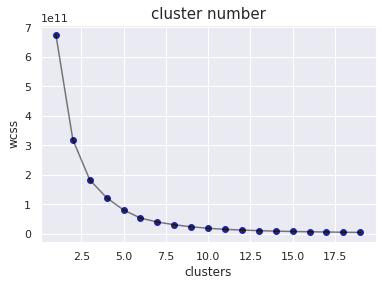

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.plot(range(1, 20), wcss[1:20], alpha=0.5, color='black')
plt.scatter(range(1, 20), wcss[1:20], alpha=0.8, color='black', edgecolors='blue')
plt.title('cluster number', fontsize=15)
plt.xlabel('clusters', fontsize=12)
plt.ylabel('wcss', fontsize=12)
plt.show()

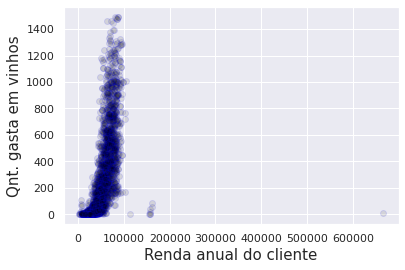

In [215]:
plt.scatter(X['Renda anual do cliente'], X['Qnt. gasta em vinho'], alpha=0.1, 
            color='black', edgecolors='blue')

plt.xlabel('Renda anual do cliente', fontsize=15)
plt.ylabel('Qnt. gasta em vinhos', fontsize=15)
plt.show()

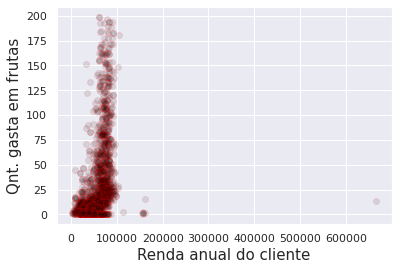

In [220]:
plt.scatter(X['Renda anual do cliente'], X['Qnt. gasta em frutas'], alpha=0.1, 
            color='black', edgecolors='red')

plt.xlabel('Renda anual do cliente', fontsize=15)
plt.ylabel('Qnt. gasta em frutas', fontsize=15)
plt.show()

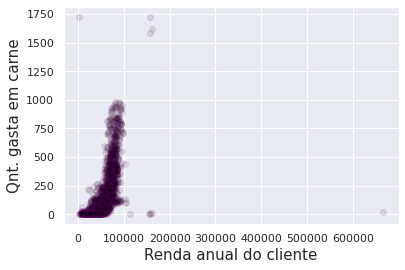

In [224]:
plt.scatter(X['Renda anual do cliente'], X['Qnt. gasta em carne'], alpha=0.1, 
            color='black', edgecolors='purple')

plt.xlabel('Renda anual do cliente', fontsize=15)
plt.ylabel('Qnt. gasta em carne', fontsize=15)
plt.show()

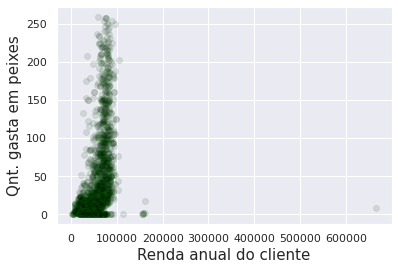

In [225]:
plt.scatter(X['Renda anual do cliente'], X['Qnt. gasta em peixe'], alpha=0.1, 
            color='black', edgecolors='green')

plt.xlabel('Renda anual do cliente', fontsize=15)
plt.ylabel('Qnt. gasta em peixes', fontsize=15)
plt.show()

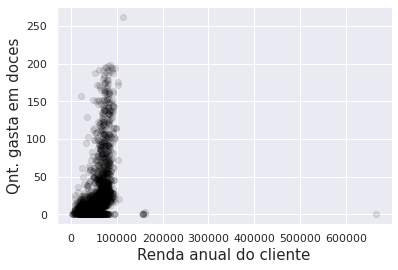

In [227]:
plt.scatter(X['Renda anual do cliente'], X['Qnt. gasta em doce'], alpha=0.1, 
            color='black', edgecolors='black')

plt.xlabel('Renda anual do cliente', fontsize=15)
plt.ylabel('Qnt. gasta em doces', fontsize=15)
plt.show()

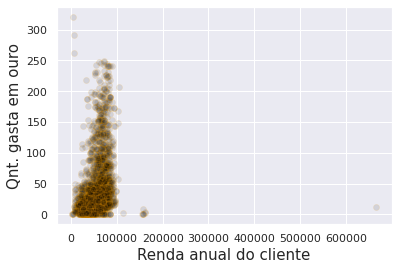

In [228]:
plt.scatter(X['Renda anual do cliente'], X['Qnt. gasta em ouro'], alpha=0.1, 
            color='black', edgecolors='orange')

plt.xlabel('Renda anual do cliente', fontsize=15)
plt.ylabel('Qnt. gasta em ouro', fontsize=15)
plt.show()